## Importing Libraries

In [1]:
!pip install -q gdown

In [2]:
!gdown https://drive.google.com/uc?id=1ITP75T-5CdS1_ccICyLdgOx-8_PaFSHV
!unzip Plant_Disease_Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Plant_Disease_Dataset/train/Potato___healthy/5ea316eb-10a2-42c0-b781-40d90356ccaa___RS_HL 1935.JPG  
  inflating: __MACOSX/Plant_Disease_Dataset/train/Potato___healthy/._5ea316eb-10a2-42c0-b781-40d90356ccaa___RS_HL 1935.JPG  
  inflating: Plant_Disease_Dataset/train/Potato___healthy/54f86311-9d76-421b-b401-0b02f6e738a5___RS_HL 4172_new90degFlipLR.JPG  
  inflating: __MACOSX/Plant_Disease_Dataset/train/Potato___healthy/._54f86311-9d76-421b-b401-0b02f6e738a5___RS_HL 4172_new90degFlipLR.JPG  
  inflating: Plant_Disease_Dataset/train/Potato___healthy/22322780-95b4-4b45-b626-26b22965d55e___RS_HL 1880_90deg.JPG  
  inflating: __MACOSX/Plant_Disease_Dataset/train/Potato___healthy/._22322780-95b4-4b45-b626-26b22965d55e___RS_HL 1880_90deg.JPG  
  inflating: Plant_Disease_Dataset/train/Potato___healthy/3c0d6888-c7e1-4cf8-9c25-9a0b8c62ba72___RS_HL 1780_new90degFlipTB.JPG  
  inflating: __MACOSX/Plant_Disease_Dataset/train/Potato___he

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image Preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'Plant_Disease_Dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


# New Section

### Validation Image Preprocessing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Plant_Disease_Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [6]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [7]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[151.75 142.75 133.75]
   [163.75 154.75 145.75]
   [159.25 150.25 141.25]
   ...
   [180.   175.   169.  ]
   [183.25 178.25 172.25]
   [180.   175.   169.  ]]

  [[158.25 149.25 140.25]
   [157.   148.   139.  ]
   [164.25 155.25 146.25]
   ...
   [194.75 189.75 183.75]
   [192.75 187.75 181.75]
   [185.25 180.25 174.25]]

  [[157.   148.   139.  ]
   [172.5  163.5  154.5 ]
   [160.75 151.75 142.75]
   ...
   [183.25 178.25 172.25]
   [191.25 186.25 180.25]
   [185.   180.   174.  ]]

  ...

  [[123.25 106.25  99.25]
   [139.75 122.75 115.75]
   [143.5  126.5  119.5 ]
   ...
   [150.25 140.25 131.25]
   [138.   128.   119.  ]
   [142.75 132.75 123.75]]

  [[135.5  118.5  111.5 ]
   [130.   113.   106.  ]
   [139.25 122.25 115.25]
   ...
   [146.25 136.25 127.25]
   [150.5  140.5  131.5 ]
   [159.25 149.25 140.25]]

  [[130.5  113.5  106.5 ]
   [136.   119.   112.  ]
   [130.   113.   106.  ]
   ...
   [147.25 137.25 128.25]
   [134.   124.   115.  ]
   [141.   131.   12

## Building Model

In [8]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Input
from tensorflow.keras.models import Sequential

In [9]:
model = Sequential()

### Building Convolution Layer

In [10]:
model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2,strides=2),
])

In [11]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1024,activation='relu'))

In [16]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     9,438,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        38,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,649,414 (40.62 MB)

 Trainable params: 10,649,414 (40.62 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [19]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 137s 57ms/step - accuracy: 0.3844 - loss: 2.2245 - val_accuracy: 0.7822 - val_loss: 0.6798
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 114s 52ms/step - accuracy: 0.8273 - loss: 0.5363 - val_accuracy: 0.8565 - val_loss: 0.4365
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 115s 52ms/step - accuracy: 0.8913 - loss: 0.3329 - val_accuracy: 0.8920 - val_loss: 0.3492
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 115s 52ms/step - accuracy: 0.9148 - loss: 0.2553 - val_accuracy: 0.8791 - val_loss: 0.4028
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 114s 52ms/step - accuracy: 0.9261 - loss: 0.2265 - val_accuracy: 0.8767 - val_loss: 0.4048
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 112s 51ms/step - accuracy: 0.9325 - loss: 0.1992 - val_accuracy: 0.8890 - val_loss: 0.3859
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 112s 51ms/step - accuracy: 0.9411 - loss: 0.1778 - val_accuracy: 0.8978 - val_loss: 0.3737
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 112s 51ms/step - accuracy: 

## Model Evaluation

In [20]:
#on training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 0.9607 - loss: 0.1255


In [21]:
print(train_loss,train_acc)

0.10829604417085648 0.965118408203125


In [22]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8859 - loss: 0.4461


In [23]:
print(val_loss,val_acc)

0.4335610568523407 0.8926132321357727


## Saving Model

In [24]:
model.save("trained_model.keras")

In [25]:
training_history.history

{'accuracy': [0.5894160270690918,
  0.8475852012634277,
  0.8973610997200012,
  0.9176186323165894,
  0.9276762008666992,
  0.9355714917182922,
  0.941148042678833,
  0.9458425045013428,
  0.9498541951179504,
  0.947848379611969],
 'loss': [1.3817521333694458,
  0.46914854645729065,
  0.3131650388240814,
  0.2459217607975006,
  0.220550537109375,
  0.19507291913032532,
  0.18021735548973083,
  0.16752193868160248,
  0.15696288645267487,
  0.16478554904460907],
 'val_accuracy': [0.7822103500366211,
  0.8565331101417542,
  0.892044186592102,
  0.8790689706802368,
  0.8766788244247437,
  0.8889710903167725,
  0.8977919220924377,
  0.8961415886878967,
  0.8872069120407104,
  0.8926132321357727],
 'val_loss': [0.679803192615509,
  0.43651294708251953,
  0.34921902418136597,
  0.4027882516384125,
  0.40478917956352234,
  0.38588404655456543,
  0.37369608879089355,
  0.39196231961250305,
  0.49632200598716736,
  0.43356090784072876]}

### Recording History In json

In [26]:
import json
with open('training_history.json', 'w') as f:
    json.dump(training_history.history, f)

## Accuracy Visualization

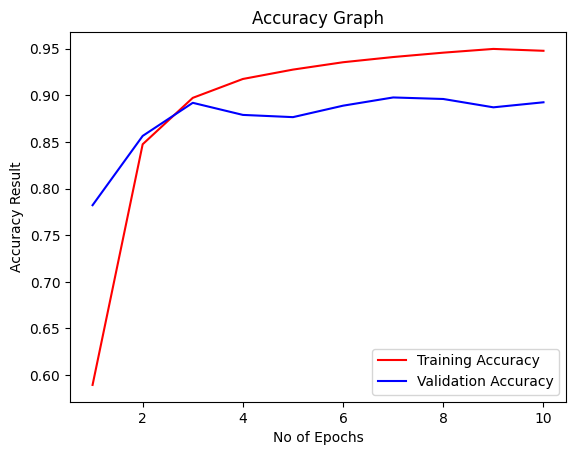

In [27]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy Result')
plt.title('Accuracy Graph')
plt.legend()
plt.show()

## Other metrics for model evaluation

In [28]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [29]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Plant_Disease_Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [30]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step


(array([[9.9999857e-01, 6.2711933e-11, 3.2697684e-12, ..., 4.4081362e-12,
         1.5817716e-20, 1.2280942e-12],
        [9.9999869e-01, 5.3241944e-10, 8.8946949e-13, ..., 4.2658470e-14,
         3.4297936e-16, 1.5227516e-16],
        [9.9999988e-01, 5.7383672e-12, 5.5556275e-11, ..., 2.6569325e-16,
         2.4872734e-13, 7.0203315e-15],
        ...,
        [3.5405712e-08, 1.1609586e-16, 3.3599274e-09, ..., 3.4229598e-07,
         6.6915237e-14, 9.9948168e-01],
        [2.4108250e-14, 6.8243198e-25, 8.0967324e-16, ..., 3.6901799e-08,
         3.0260457e-17, 9.9999988e-01],
        [3.7493682e-18, 1.4649952e-18, 1.8850212e-17, ..., 1.6793155e-13,
         1.2717393e-11, 9.9998701e-01]], dtype=float32),
 (17572, 38))

In [31]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [32]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [33]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

1. Precision
2. Recall
3. F1 Score
4. Accuracy



In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_true, predicted_categories, target_names = class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.88      0.78      0.83       504
                                 Apple___Black_rot       0.98      0.88      0.93       497
                          Apple___Cedar_apple_rust       0.97      0.88      0.92       440
                                   Apple___healthy       0.81      0.91      0.86       502
                               Blueberry___healthy       0.94      0.92      0.93       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.92      0.95       421
                 Cherry_(including_sour)___healthy       0.95      0.95      0.95       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.84      0.89       410
                       Corn_(maize)___Common_rust_       0.99      0.97      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.88      0.95      0.

### Confusion Matrix

In [35]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

In [ ]:
#Visualization

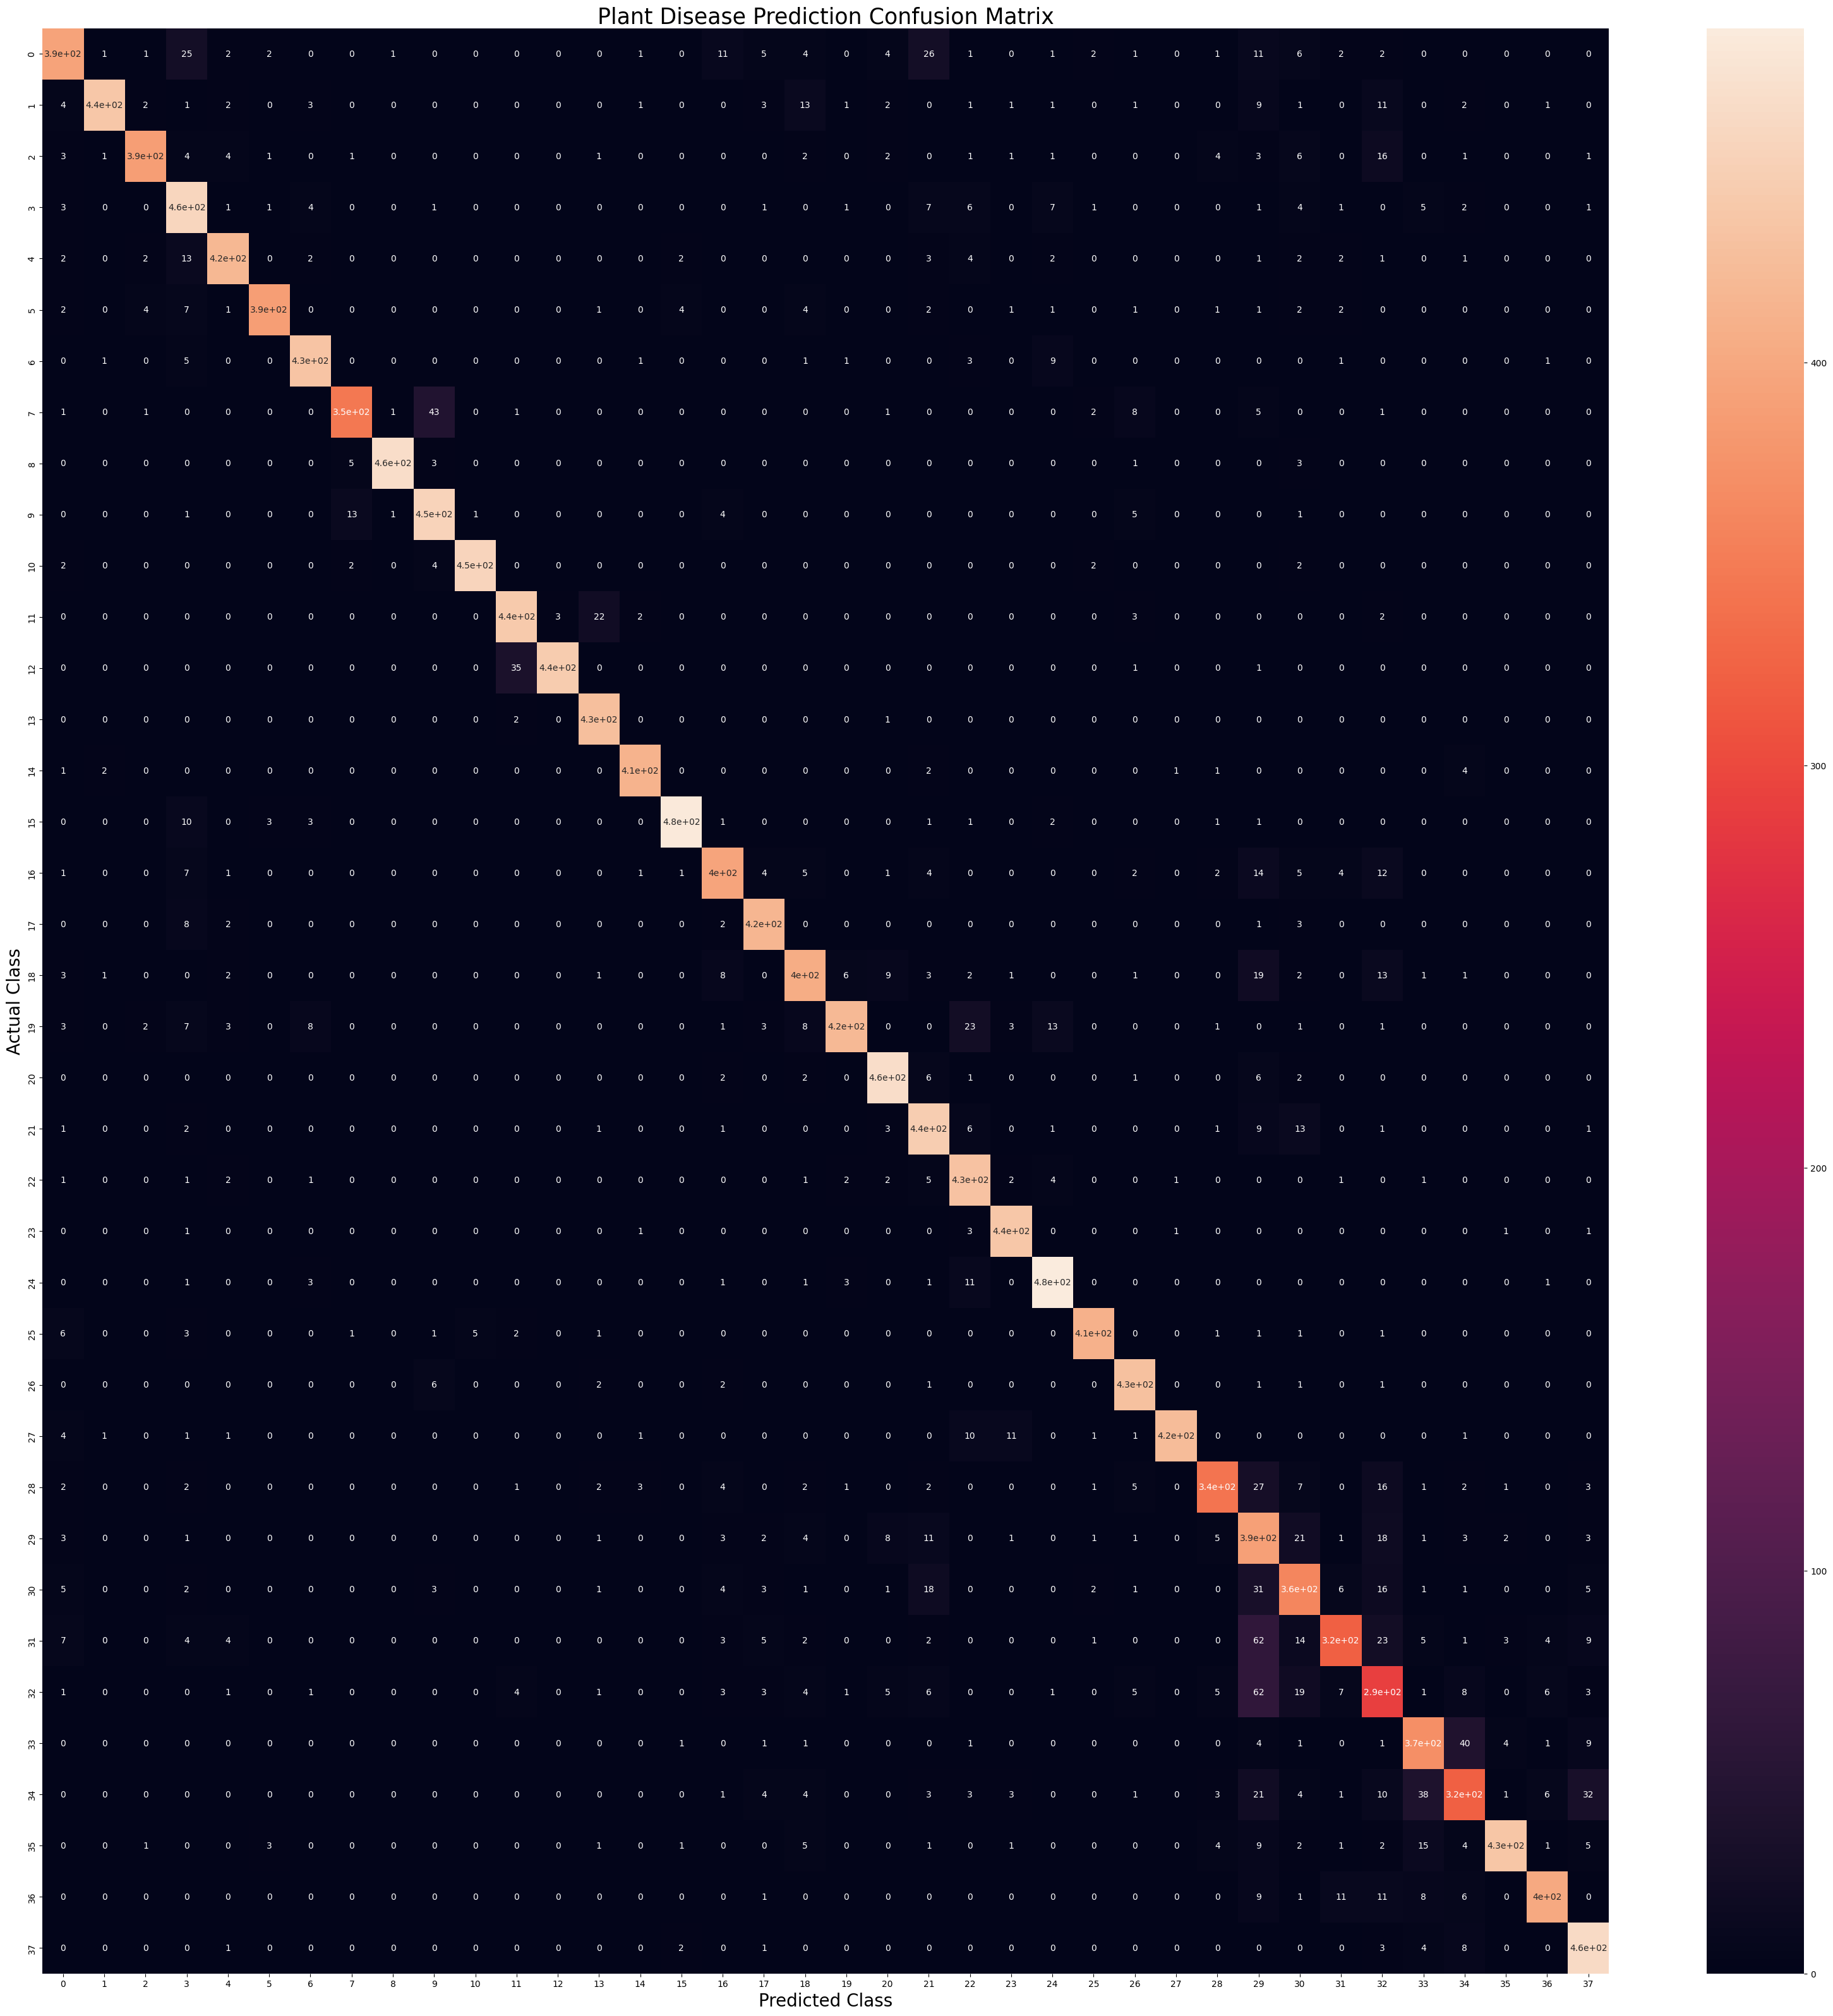

In [38]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True, annot_kws={'size':10} )
plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Plant Disease Prediction Confusion Matrix', fontsize=25)
plt.show()